In [36]:
# !pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score


# The dataset

In [37]:


statlog_german_credit_data = fetch_ucirepo(id=144) 


X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 


print(statlog_german_credit_data.metadata) 

print(statlog_german_credit_data.variables) 


{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [38]:
X

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


In [39]:
y

,class
0,1
1,2
2,1
3,1
4,2
...,...
995,1
996,1
997,1
998,2


In [40]:
data = pd.concat([X, y.squeeze().rename("target")], axis=1)


# Exploratory Data Analysis (EDA)

In [41]:
# Checking for missing values
print("Missing values:")
print(data.isnull().sum())

Missing values:
Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute8     0
Attribute9     0
Attribute10    0
Attribute11    0
Attribute12    0
Attribute13    0
Attribute14    0
Attribute15    0
Attribute16    0
Attribute17    0
Attribute18    0
Attribute19    0
Attribute20    0
target         0
dtype: int64


In [42]:

print("\nSummary statistics:")
print(data.describe())


Summary statistics:
        Attribute2    Attribute5   Attribute8  Attribute11  Attribute13  \
count  1000.000000   1000.000000  1000.000000  1000.000000  1000.000000   
mean     20.903000   3271.258000     2.973000     2.845000    35.546000   
std      12.058814   2822.736876     1.118715     1.103718    11.375469   
min       4.000000    250.000000     1.000000     1.000000    19.000000   
25%      12.000000   1365.500000     2.000000     2.000000    27.000000   
50%      18.000000   2319.500000     3.000000     3.000000    33.000000   
75%      24.000000   3972.250000     4.000000     4.000000    42.000000   
max      72.000000  18424.000000     4.000000     4.000000    75.000000   

       Attribute16  Attribute18       target  
count  1000.000000  1000.000000  1000.000000  
mean      1.407000     1.155000     1.300000  
std       0.577654     0.362086     0.458487  
min       1.000000     1.000000     1.000000  
25%       1.000000     1.000000     1.000000  
50%       1.000000   

In [43]:

column_mapping = {
    'Attribute1': 'Checking Account Status',
    'Attribute2': 'Duration (months)',
    'Attribute3': 'Credit History',
    'Attribute4': 'Purpose',
    'Attribute5': 'Credit Amount',
    'Attribute6': 'Savings Account/Bonds',
    'Attribute7': 'Employment Duration',
    'Attribute8': 'Installment Rate (%)',
    'Attribute9': 'Personal Status and Sex',
    'Attribute10': 'Other Debtors/Guarantors',
    'Attribute11': 'Residence Duration',
    'Attribute12': 'Property',
    'Attribute13': 'Age (years)',
    'Attribute14': 'Other Installment Plans',
    'Attribute15': 'Housing',
    'Attribute16': 'Existing Credits Count',
    'Attribute17': 'Job',
    'Attribute18': 'Dependents Count',
    'Attribute19': 'Telephone Availability',
    'Attribute20': 'Foreign Worker',
    'class': 'Credit Risk'  # 1 = Good, 2 = Bad
}

data.rename(columns=column_mapping, inplace=True)

print(data.columns)

Index(['Checking Account Status', 'Duration (months)', 'Credit History',
       'Purpose', 'Credit Amount', 'Savings Account/Bonds',
       'Employment Duration', 'Installment Rate (%)',
       'Personal Status and Sex', 'Other Debtors/Guarantors',
       'Residence Duration', 'Property', 'Age (years)',
       'Other Installment Plans', 'Housing', 'Existing Credits Count', 'Job',
       'Dependents Count', 'Telephone Availability', 'Foreign Worker',
       'target'],
      dtype='object')


### Target distribution

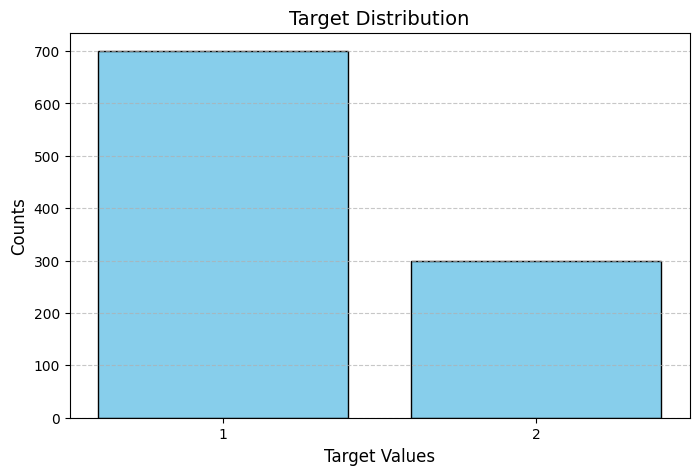

In [44]:

target_counts = data['target'].value_counts().sort_index() 

plt.figure(figsize=(8, 5))
plt.bar(target_counts.index, target_counts.values, color='skyblue', edgecolor='black')
plt.title("Target Distribution", fontsize=14)
plt.xlabel("Target Values", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.xticks(target_counts.index, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('C:/Users/PC/Desktop/Clustering Salford___/Target distribution.png')
plt.show()


#### Features Distribution

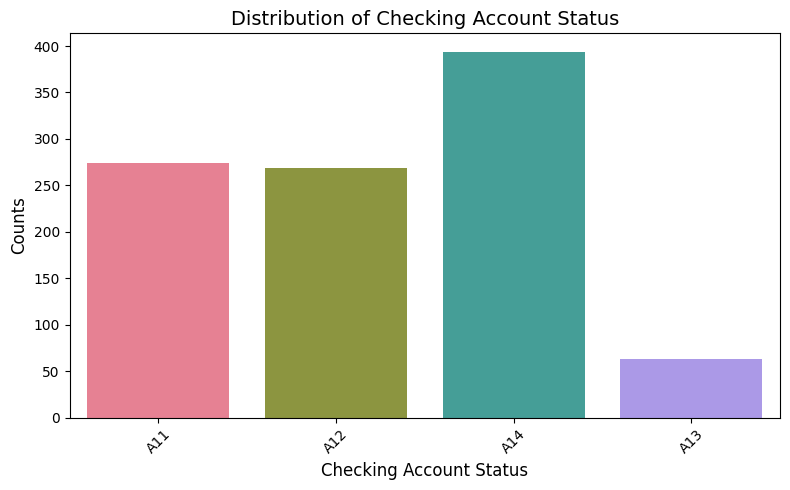

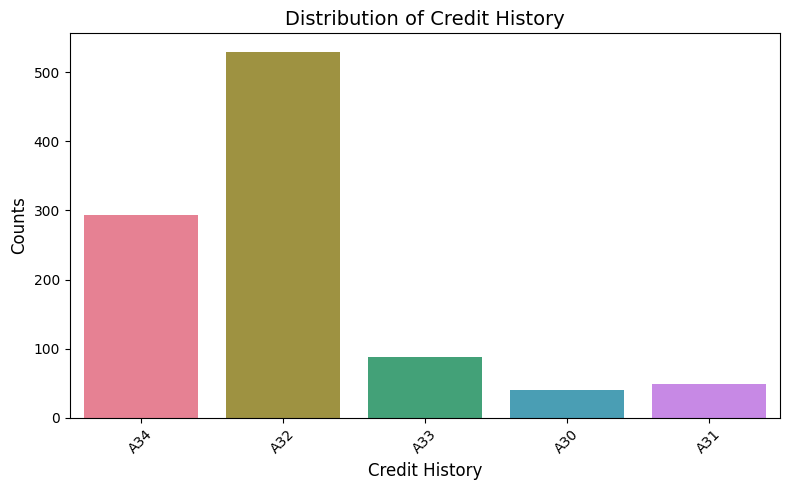

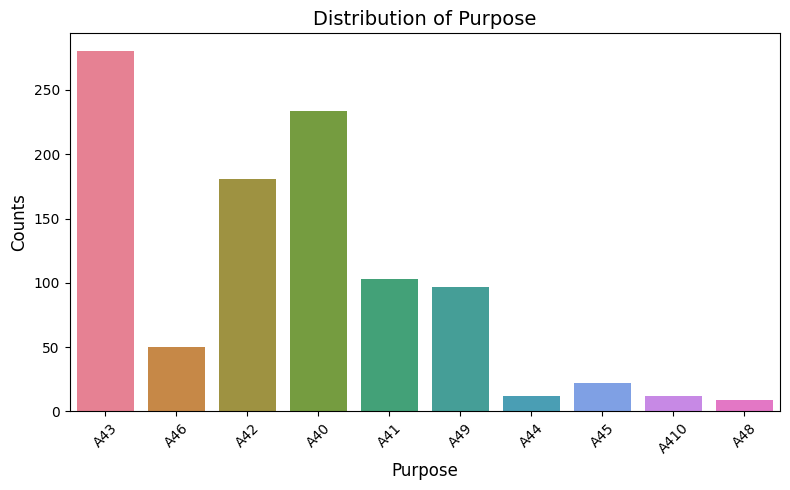

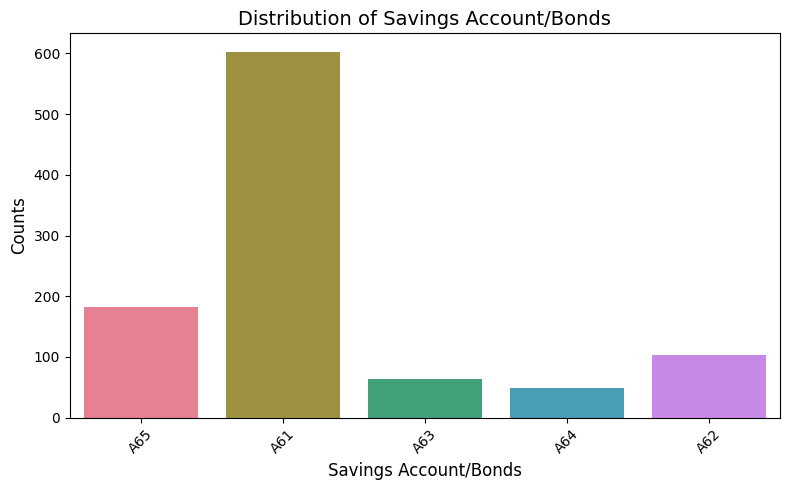

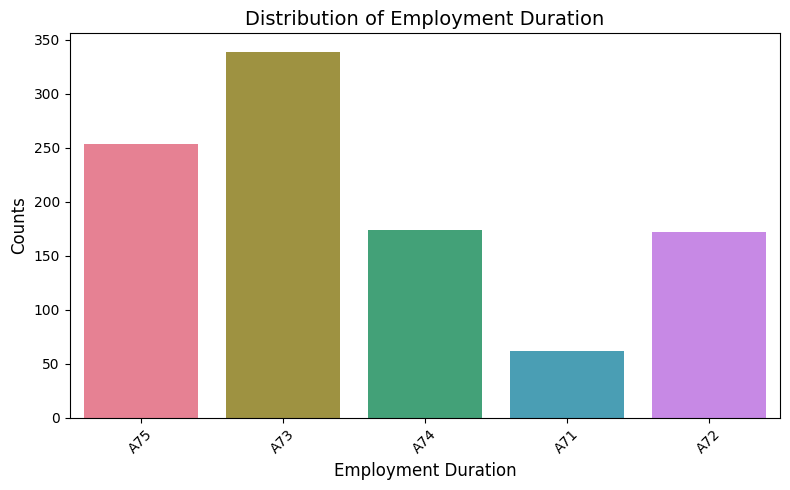

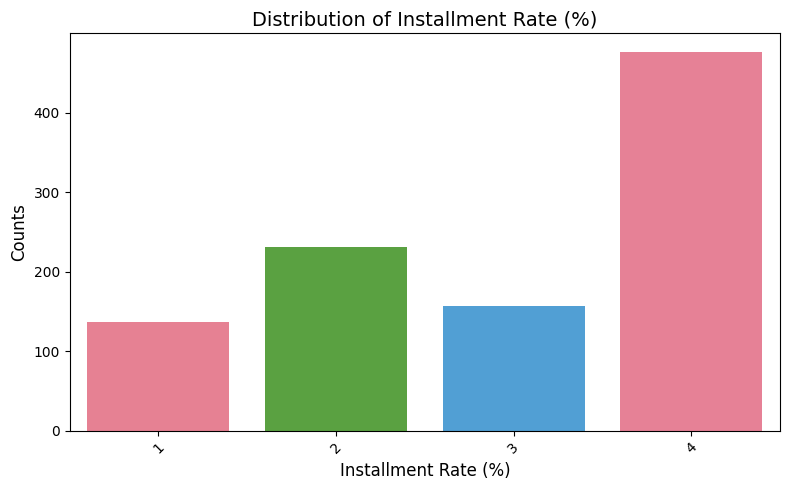

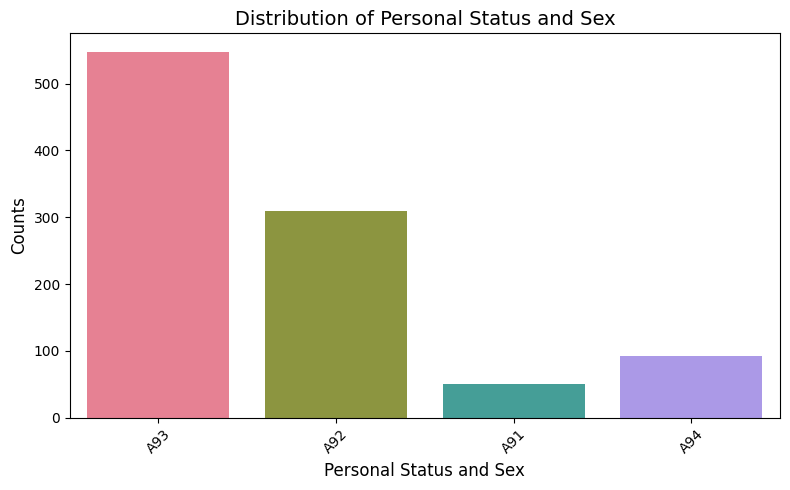

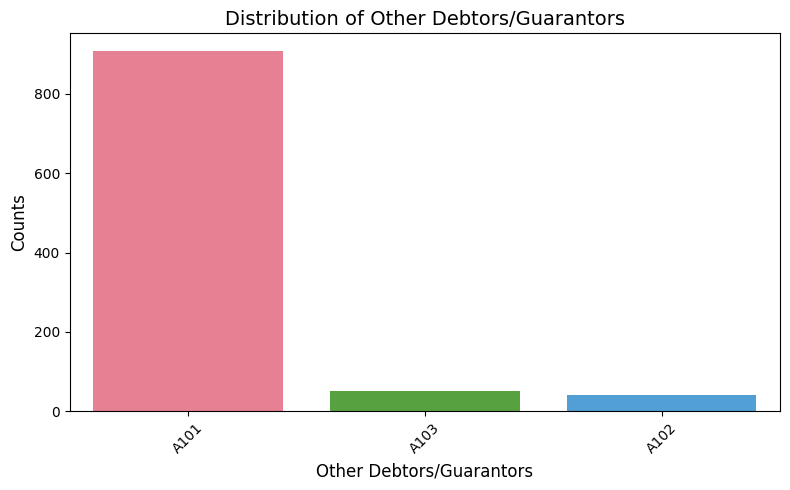

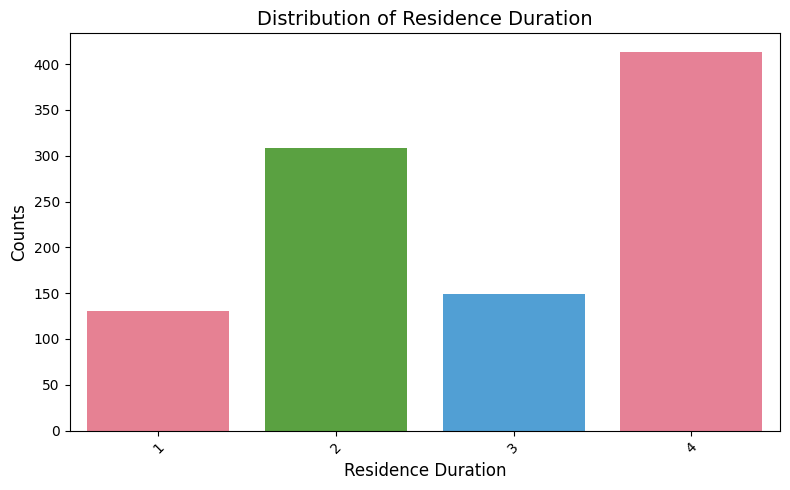

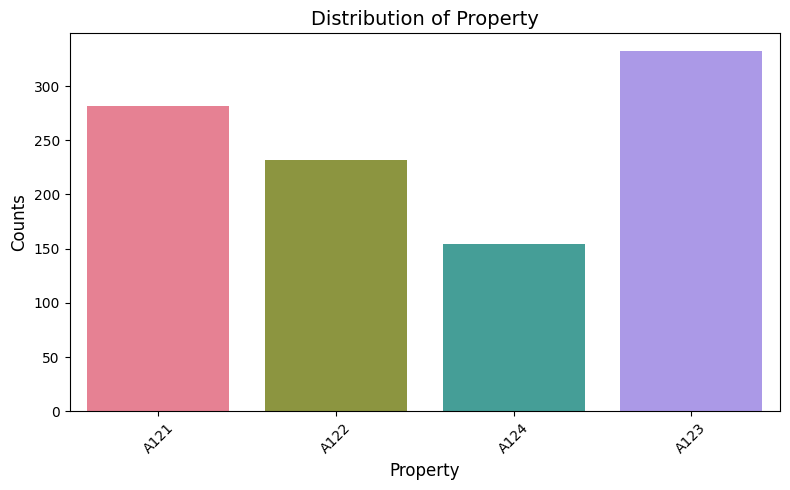

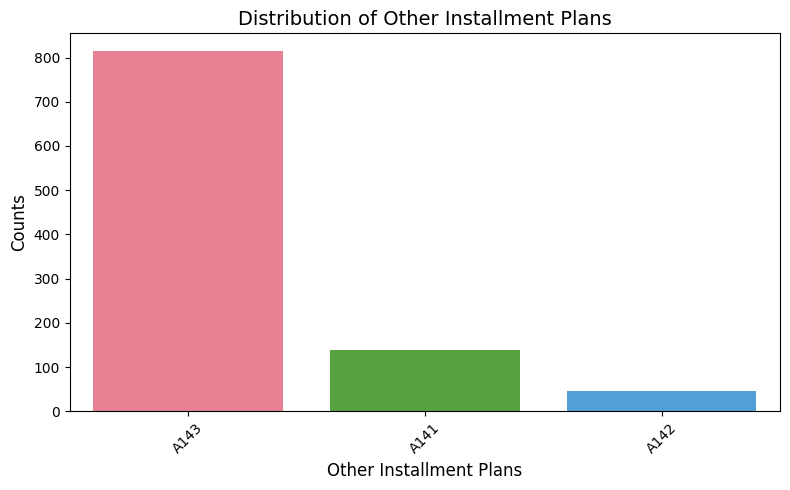

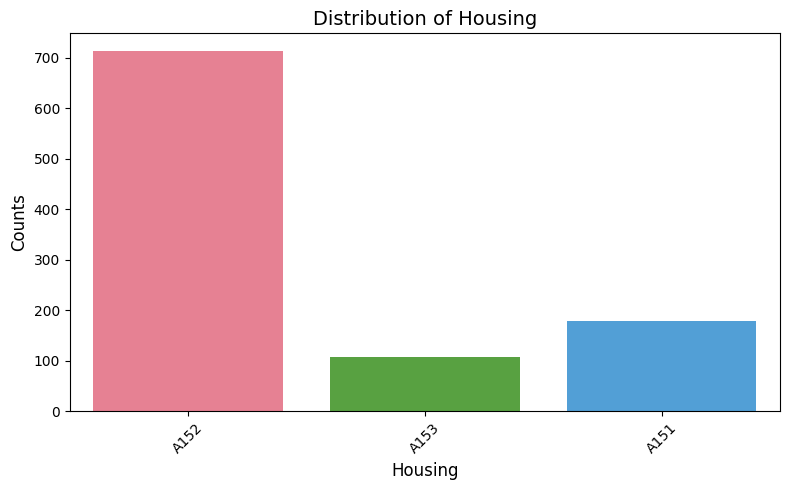

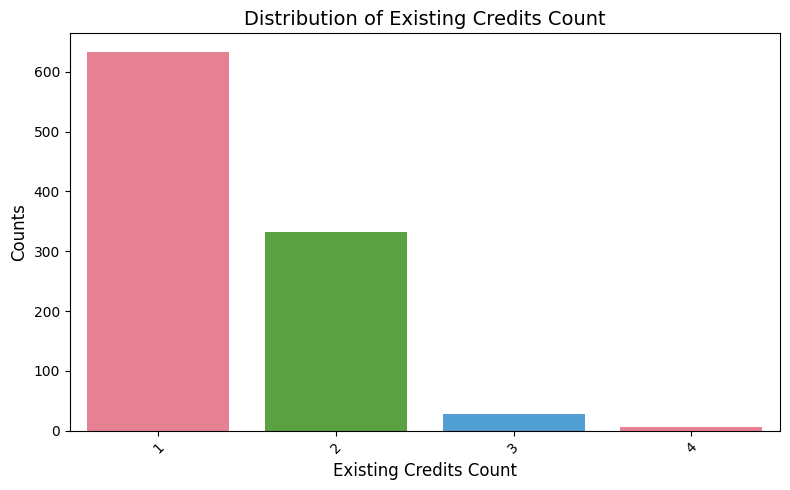

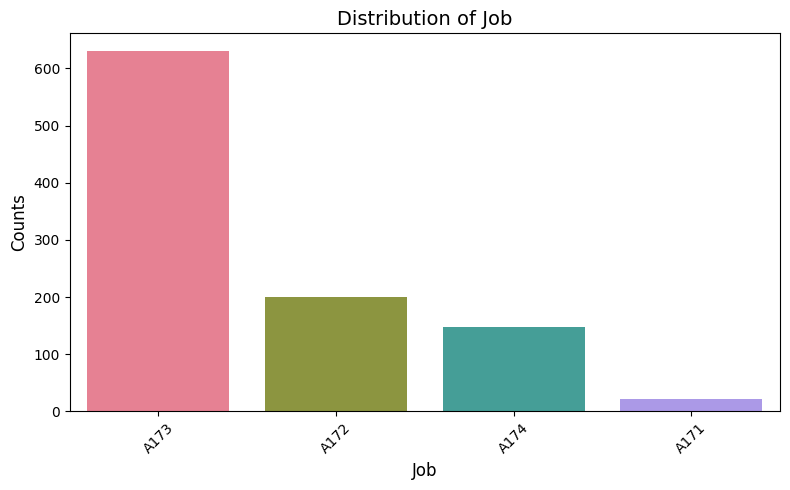

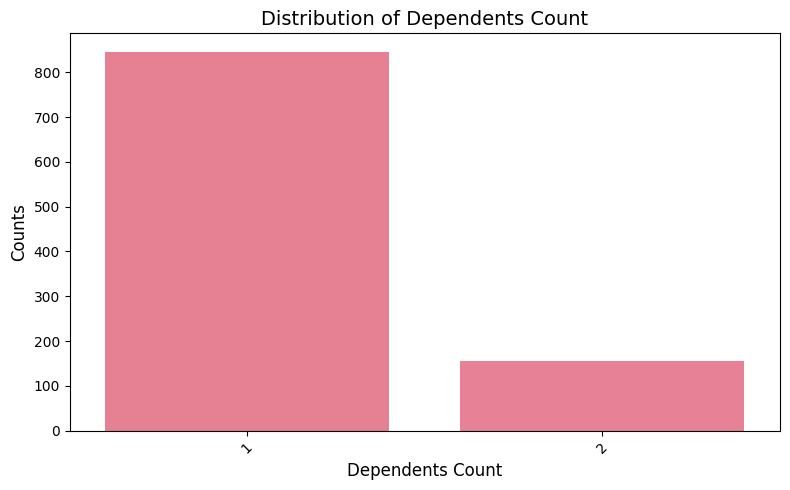

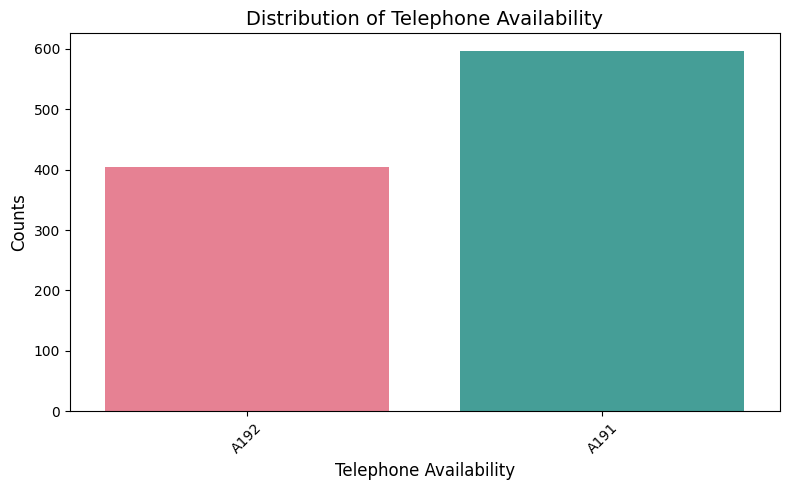

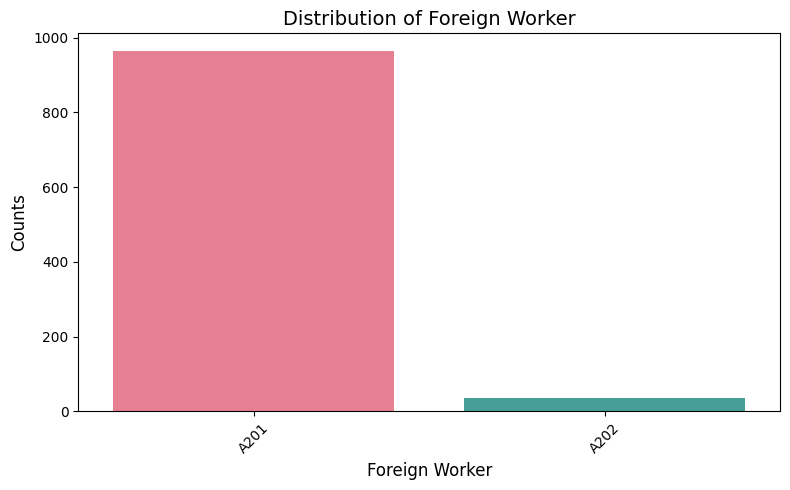

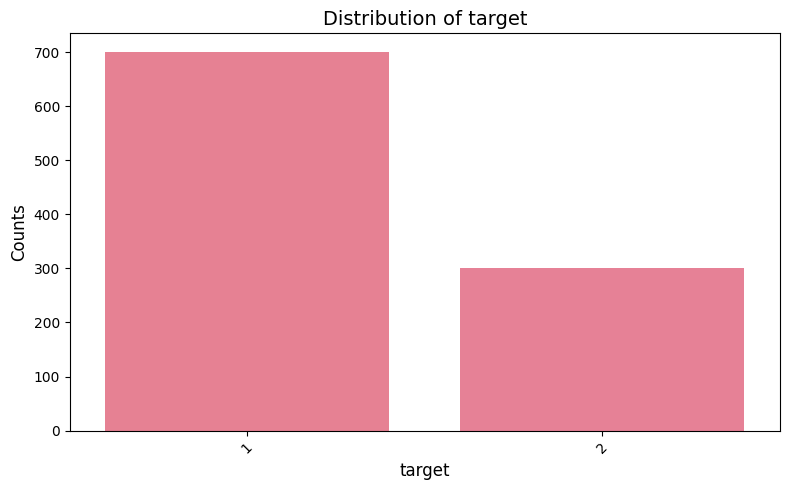

In [45]:

for col in data.columns:
    if data[col].dtype == 'object' or data[col].nunique() < 20:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=col, data=data, hue=col, palette="husl", dodge=False, legend=False) 
        plt.title(f"Distribution of {col}", fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Counts", fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.tight_layout()
        plt.show()


#### Correlation matrix

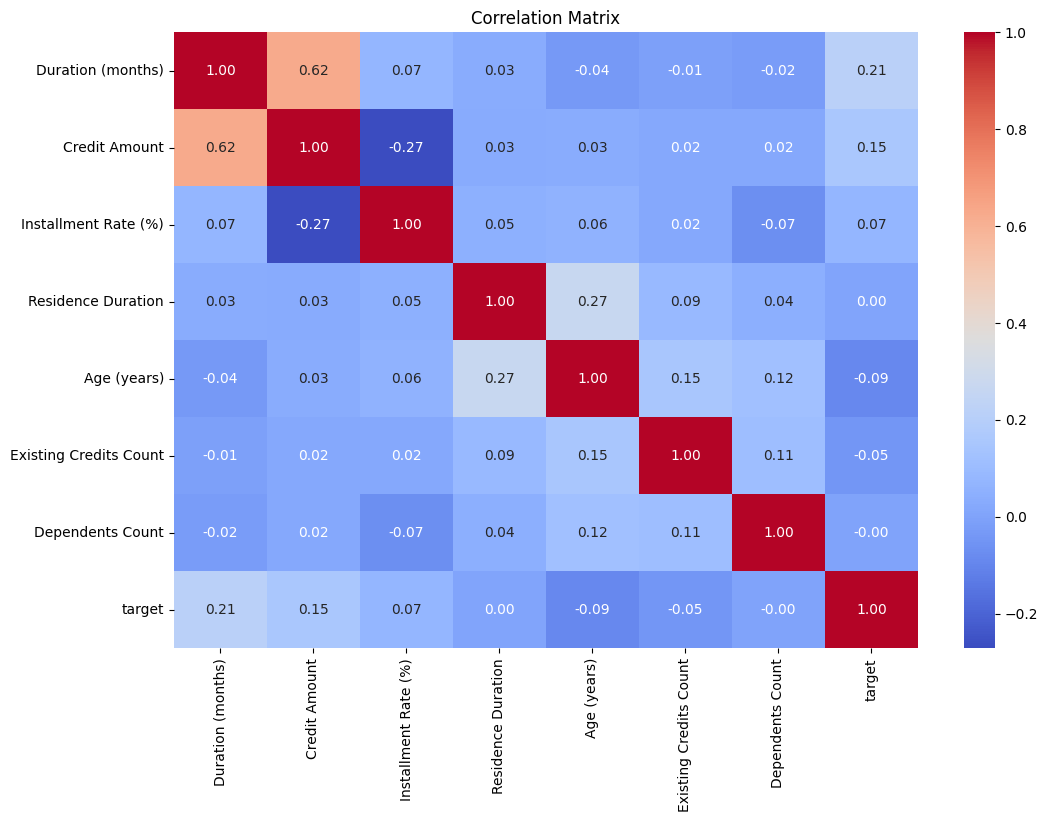

In [46]:

numeric_data = data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.savefig('C:/Users/PC/Desktop/Clustering Salford___/correlation classification.png')
plt.show()


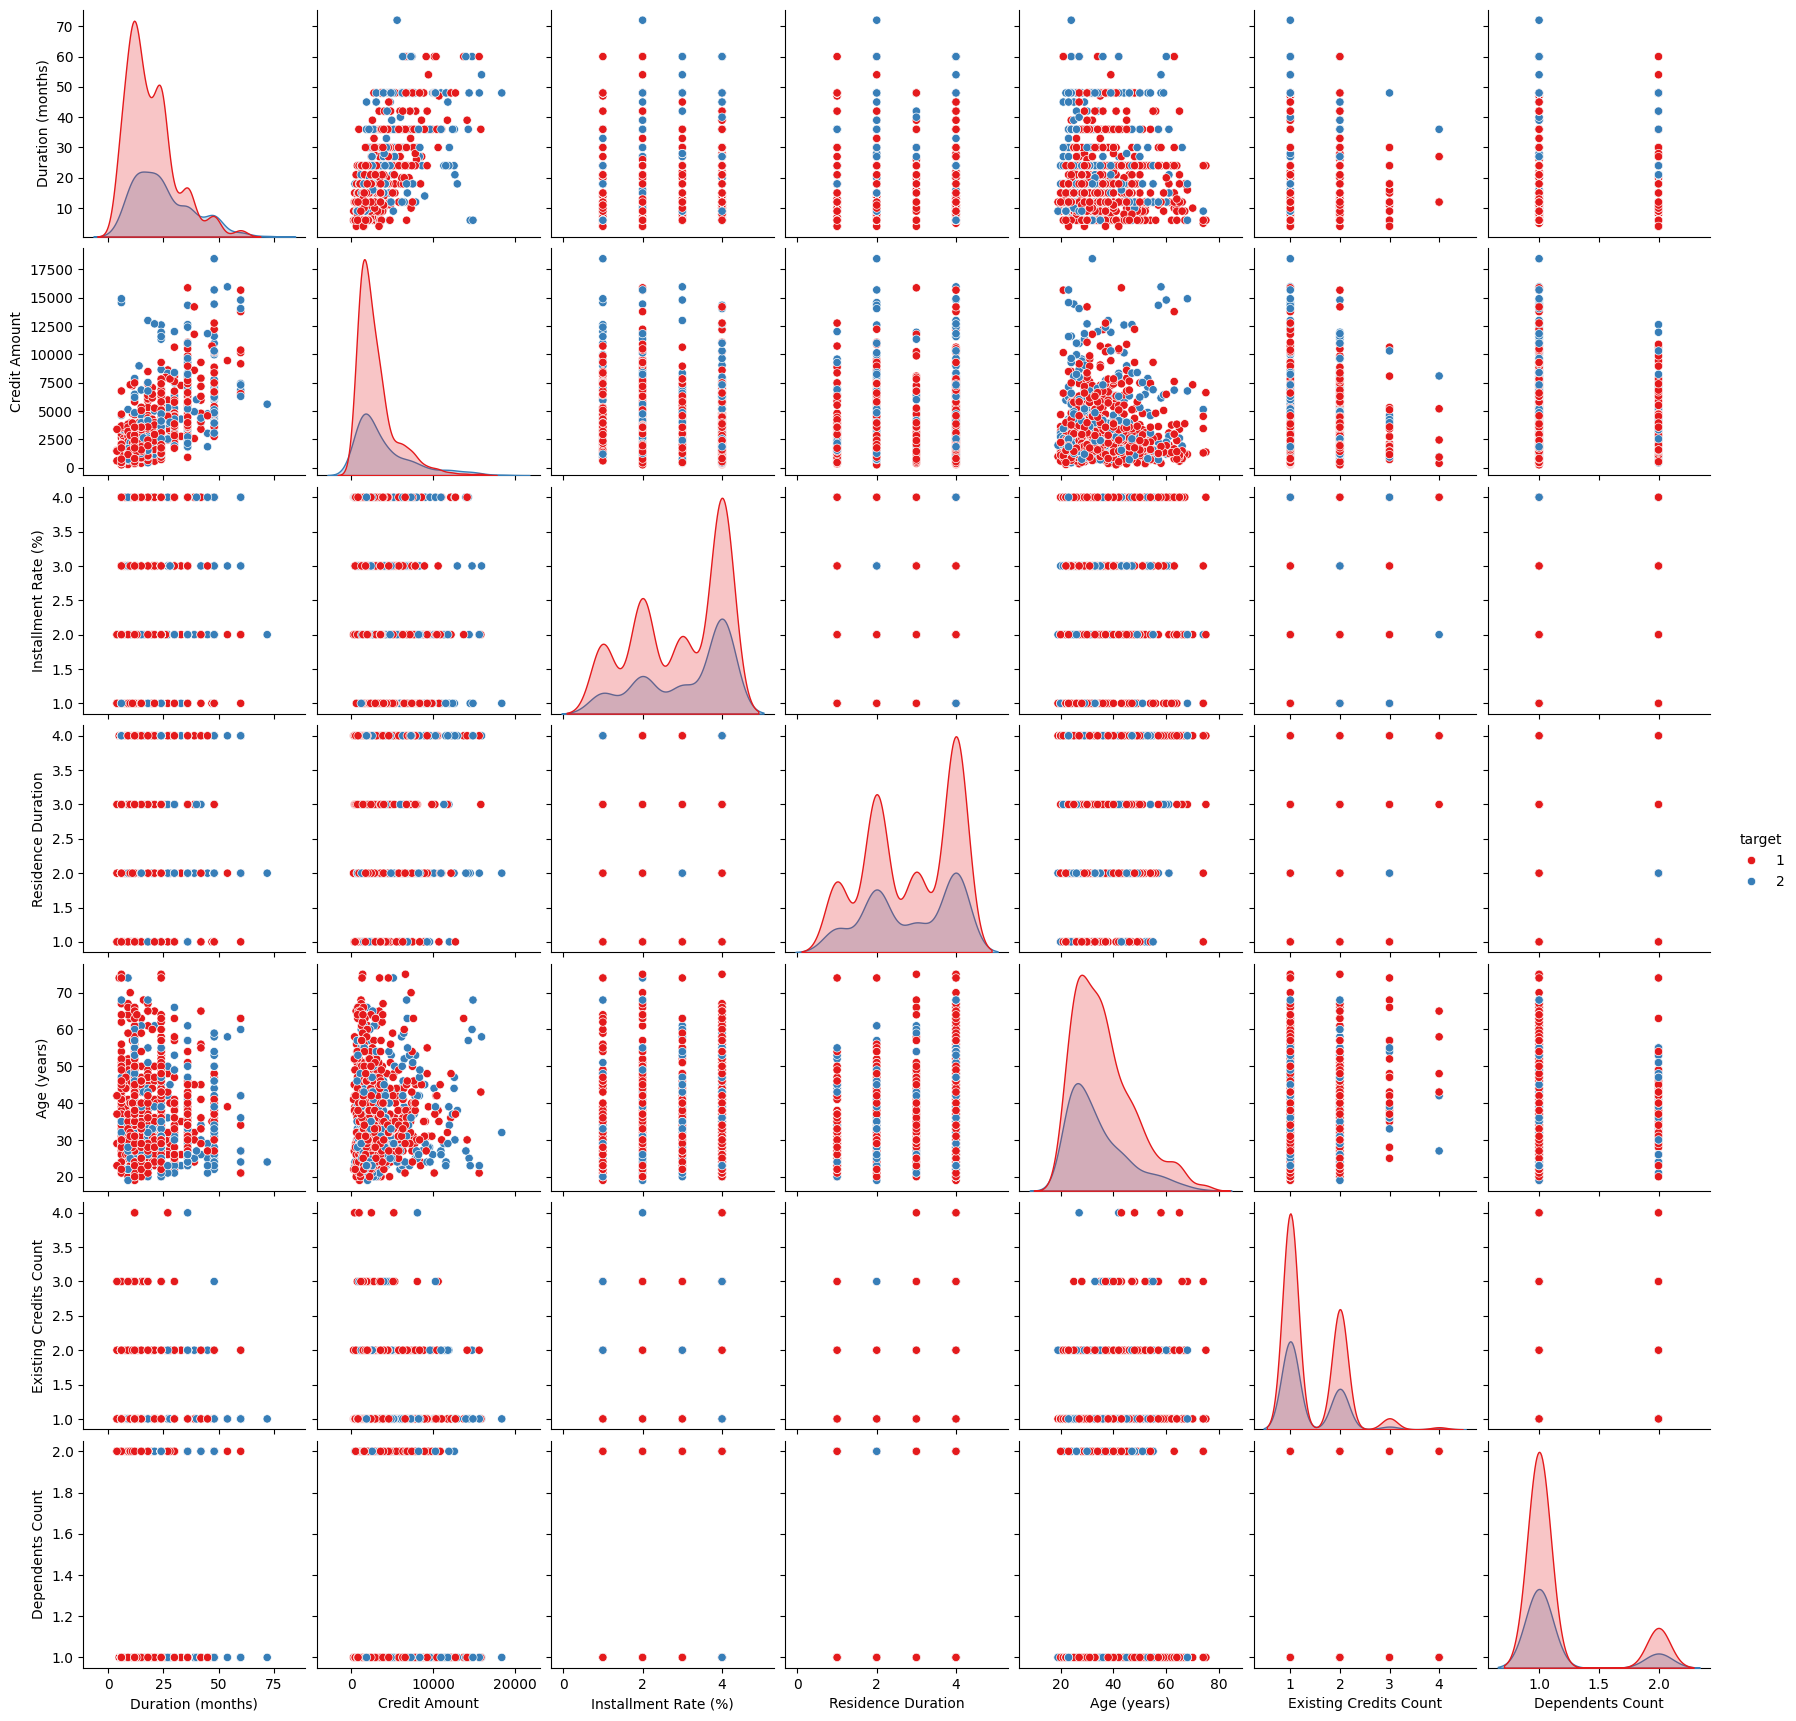

In [47]:

sns.pairplot(numeric_data, hue="target", palette="Set1")
plt.savefig('C:/Users/PC/Desktop/Clustering Salford___/Pairplot.png')

plt.show()


# Data Processing

In [48]:

column_mapping = {
    'Attribute1': 'Checking Account Status',
    'Attribute2': 'Duration (months)',
    'Attribute3': 'Credit History',
    'Attribute4': 'Purpose',
    'Attribute5': 'Credit Amount',
    'Attribute6': 'Savings Account/Bonds',
    'Attribute7': 'Employment Duration',
    'Attribute8': 'Installment Rate (%)',
    'Attribute9': 'Personal Status and Sex',
    'Attribute10': 'Other Debtors/Guarantors',
    'Attribute11': 'Residence Duration',
    'Attribute12': 'Property',
    'Attribute13': 'Age (years)',
    'Attribute14': 'Other Installment Plans',
    'Attribute15': 'Housing',
    'Attribute16': 'Existing Credits Count',
    'Attribute17': 'Job',
    'Attribute18': 'Dependents Count',
    'Attribute19': 'Telephone Availability',
    'Attribute20': 'Foreign Worker'
}

X.rename(columns=column_mapping, inplace=True)

print(X.columns)

Index(['Checking Account Status', 'Duration (months)', 'Credit History',
       'Purpose', 'Credit Amount', 'Savings Account/Bonds',
       'Employment Duration', 'Installment Rate (%)',
       'Personal Status and Sex', 'Other Debtors/Guarantors',
       'Residence Duration', 'Property', 'Age (years)',
       'Other Installment Plans', 'Housing', 'Existing Credits Count', 'Job',
       'Dependents Count', 'Telephone Availability', 'Foreign Worker'],
      dtype='object')


C:\Users\PC\AppData\Local\Temp\ipykernel_2220\2666235673.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.rename(columns=column_mapping, inplace=True)


In [49]:

for col in X.select_dtypes(include=["object"]).columns:
    X.loc[:, col] = LabelEncoder().fit_transform(X[col])


In [50]:

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [51]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Classification Models

## Logistic Regression

In [52]:

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train.values.ravel()) 
y_pred_lr = lr_model.predict(X_test)



In [53]:
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.86      0.84       140
           2       0.63      0.53      0.58        60

    accuracy                           0.77       200
   macro avg       0.72      0.70      0.71       200
weighted avg       0.76      0.77      0.76       200

Logistic Regression Accuracy: 0.765


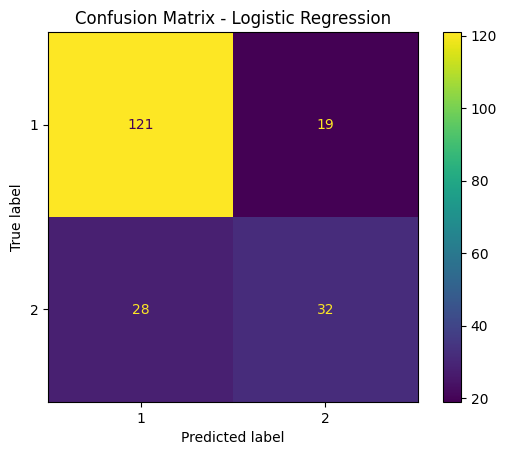

In [54]:

ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test)
plt.title("Confusion Matrix - Logistic Regression")
plt.savefig('C:/Users/PC/Desktop/Clustering Salford___/confusion matrix logistic regression.png')
plt.show()

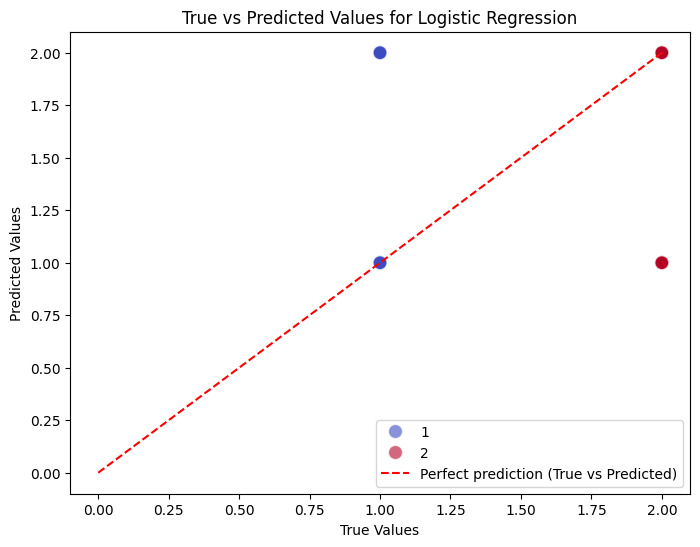

In [55]:

y_test_flat = y_test.values.ravel()  
y_pred_lr_flat = y_pred_lr.ravel() 

plt.figure(figsize=(8, 6))

sns.scatterplot(x=y_test_flat, y=y_pred_lr_flat, hue=y_test_flat, palette='coolwarm', alpha=0.6, s=100)

plt.plot([0, 2], [0, 2], 'r--', label="Perfect prediction (True vs Predicted)")

plt.title('True vs Predicted Values for Logistic Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.savefig('C:/Users/PC/Desktop/Clustering Salford___/True vs pred logistic regression.png')

plt.show()


# Roc Curve

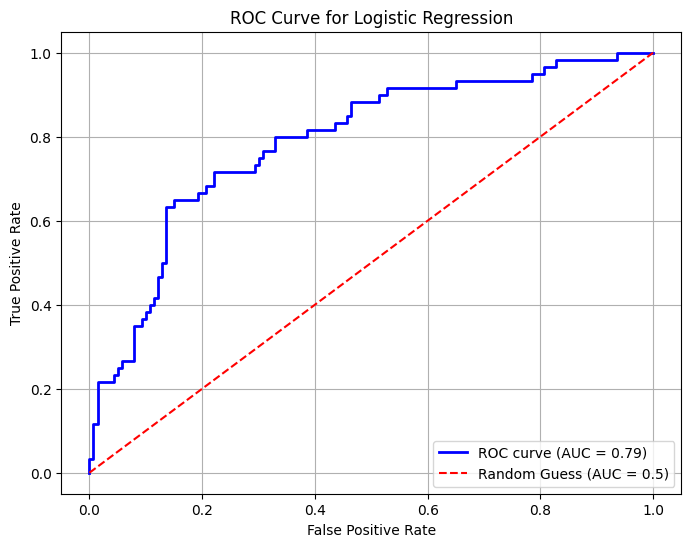

In [56]:

y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr, pos_label=2)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('C:/Users/PC/Desktop/Clustering Salford___/ROC CURVE LOGISTIC.png')

plt.show()


# Precision - Recall Curve

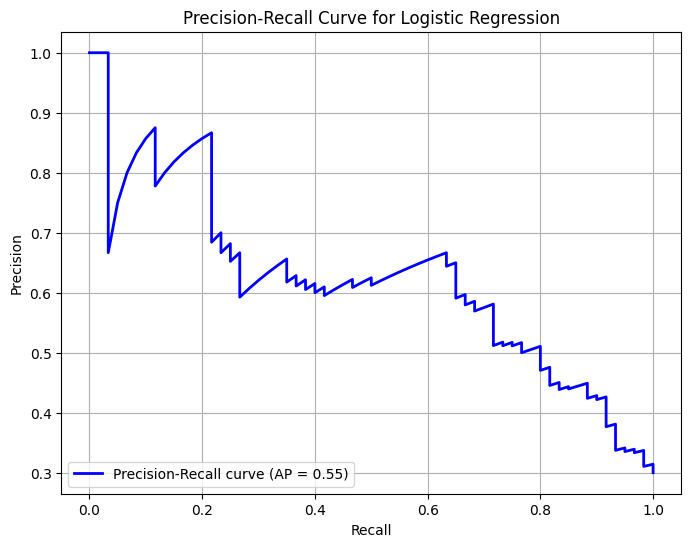

In [57]:

y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob_lr, pos_label=2)

average_precision = average_precision_score(y_test, y_prob_lr)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend(loc='lower left')
plt.grid(True)
plt.savefig('C:/Users/PC/Desktop/Clustering Salford___/PRECISION RECALL LOGISTIC.png')

plt.show()


# Random Forest

In [58]:

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train.values.ravel())  

y_pred_rf = rf_model.predict(X_test)


In [59]:

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.91      0.84       140
           2       0.68      0.42      0.52        60

    accuracy                           0.77       200
   macro avg       0.73      0.67      0.68       200
weighted avg       0.75      0.77      0.75       200

Random Forest Accuracy: 0.765


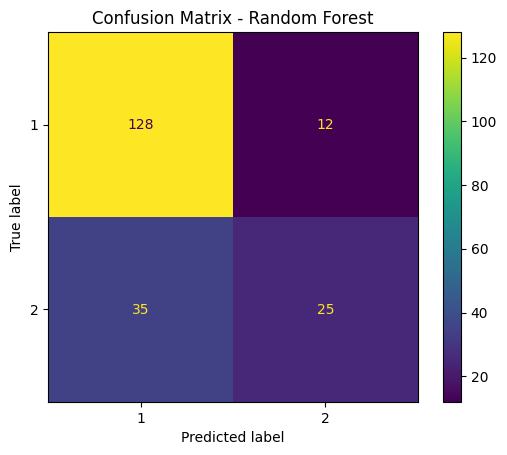

In [60]:

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Confusion Matrix - Random Forest")
plt.savefig('C:/Users/PC/Desktop/Clustering Salford___/RANDOM FOREST CONFUSION MATRIX.png')
plt.show()

# Feature Importance

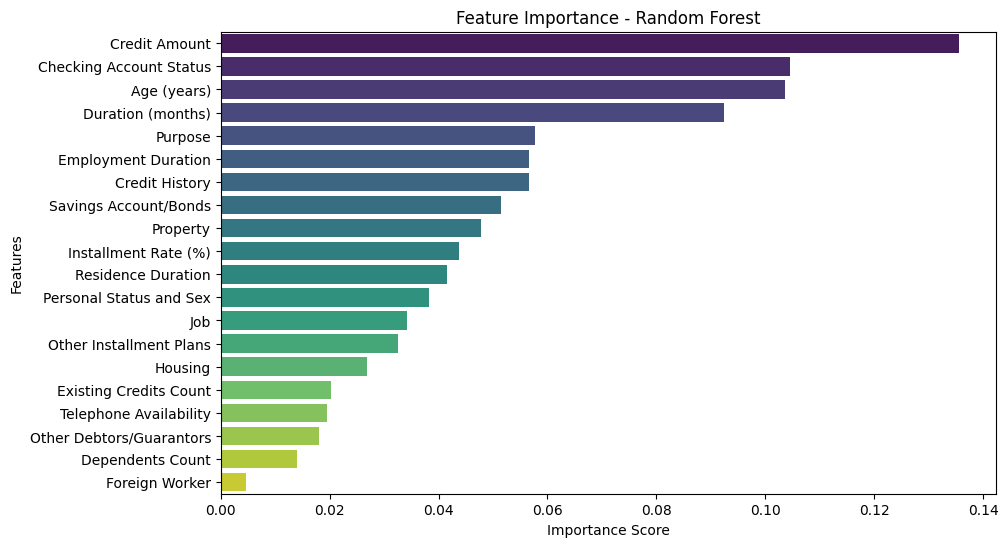

In [61]:

feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, hue=feature_importance.index, palette="viridis", legend=False)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.savefig('C:/Users/PC/Desktop/Clustering Salford___/FEATURE IMPORTANCE.png')

plt.show()


# ROC Curve and AUC (Receiver Operating Characteristic Curve)

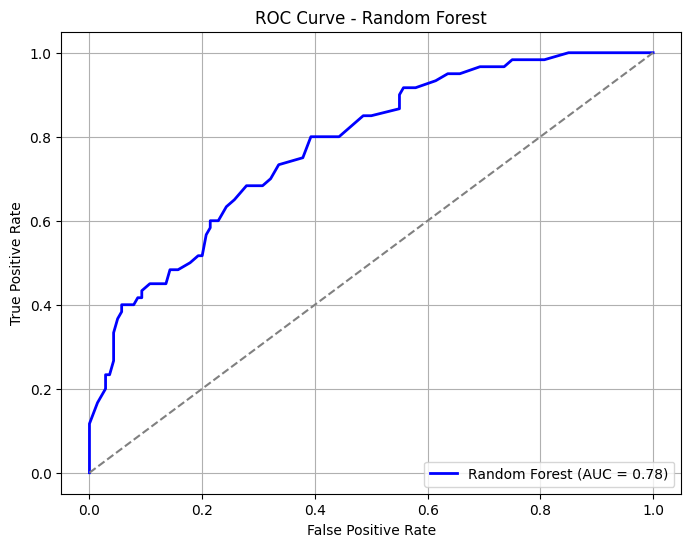

In [62]:

fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1], pos_label=2)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('C:/Users/PC/Desktop/Clustering Salford___/ROC CURVE RANDOM.png')

plt.show()


# Precision-Recall Curve

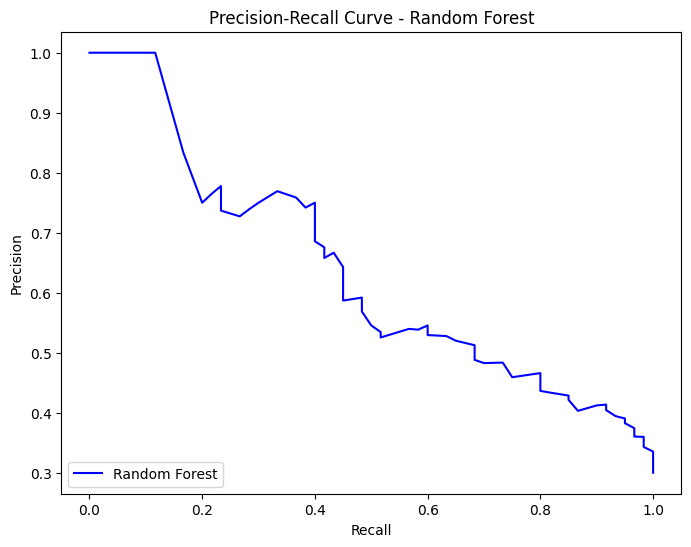

In [63]:

precision, recall, _ = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:, 1], pos_label=2)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'Random Forest')
plt.title("Precision-Recall Curve - Random Forest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.savefig('C:/Users/PC/Desktop/Clustering Salford___/PRECISION RECALL RANDOM.png')

plt.show()
